## 2. Prediction - Cold Numbers - Least drawn Numbers since beginning of Records

### About this Method and the assumption we have behind it:
- There are Numbers which have been drawn less than others
- We try our Luck and pick the 6 least frequent Drawn Numbers

### The Statistical Assumption behind this
- In a perfect World with infinite Lottery Games all Numbers should always be drawn equally often at one point in time
- We will assume, that this time is now, where the least drawn Numbers have to be drawn few times in a row to make some Points good at the Drawed Counter

For this 2 Prediction we Take the 6 least Drawn Numbers
Since there is only 1 Superzahl per Lottery Ticket we will Stick to 7 and 4 in rotation like we said in Notebook 1 and kick out the Superzahl Dataframe


# I will run through this faster now. It is similar Approach like in 2 Notebook

In [31]:
# Import Libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

### Load the Data we Stored in the data Folder with Notebook 1

In [32]:

# Load the CSV file into a DataFrame
frequency_data = pd.read_csv("data/frequency_data.csv")


### Now we count the Frequency of the Numbers which were drawn since the beginning of the Records

In [33]:
frequency_data.head()

,id,date,Lottozahl,Superzahl
0,1,09.10.1955,"[3, 12, 13, 16, 23, 41]",NaN
1,2,16.10.1955,"[3, 12, 18, 30, 32, 49]",NaN
2,3,23.10.1955,"[12, 14, 23, 24, 34, 36]",NaN
3,4,30.10.1955,"[4, 13, 23, 30, 36, 44]",NaN
4,5,06.11.1955,"[5, 6, 31, 39, 44, 49]",NaN


In [34]:
frequency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4795 non-null   int64  
 1   date       4795 non-null   object 
 2   Lottozahl  4795 non-null   object 
 3   Superzahl  2909 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 150.0+ KB


### We See Lottozahl is a String looking like 1 List 
we will handle this in the process

PLEASE RUN EACH LINE ONLY ONCE OTHERWISE U WILL RUN INTO AN ERROR FOR THE TRANSFORMING WE DO HERE

In [35]:
# Convert the string representations of lists to lists
frequency_data["Lottozahl"] = frequency_data["Lottozahl"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# define lotto_numbers this will make a 1 column DF with 6* same Index for 1 drawing
# So 6 rows for each drawing in this column now 
lotto_numbers = frequency_data["Lottozahl"].explode().astype(int)
lotto_numbers_count = lotto_numbers.value_counts().sort_values(ascending=True)


# Plot our Numbers Drawn with Countplots

### For Lottozahlen

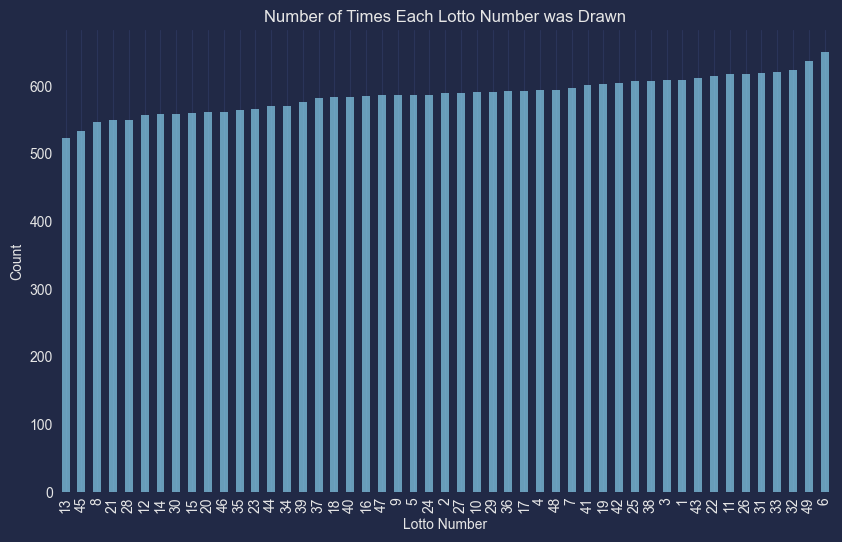

In [36]:
# Plot Lottozahl counts
plt.figure(figsize=(10, 6))
lotto_numbers_count.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Times Each Lotto Number was Drawn')
plt.xlabel('Lotto Number')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [37]:
# Readable Format
print("Least Amount Drawn per Number:", lotto_numbers_count)

Least Amount Drawn per Number: Lottozahl
13    523
45    534
8     546
21    549
28    550
12    557
14    558
30    559
15    560
20    561
46    561
35    565
23    566
44    570
34    571
39    576
37    582
18    583
40    584
16    585
47    586
9     587
5     587
24    587
2     589
27    590
10    591
29    591
36    592
17    592
4     594
48    594
7     597
41    602
19    603
42    604
25    607
38    607
3     609
1     609
43    612
22    615
11    617
26    618
31    619
33    620
32    624
49    637
6     650
Name: count, dtype: int64


# Predictions for the 2 Lottery Ticket Field!

### DISCLAIMER:
- This is a Fun Project to Showcase some IT Skills
- Lottery is a total statistically Random Game
- Do not use or let you inspire by this Prediction!
- Gambling can make you addicted! Only Play with Caution!
- I claim no rights, that my outputs would even be near the drawn value

### About the Predictions:
- In Field 2 we go for the Least Frequent Numbers each Lottery Ticket we play
- The Superzahl only appears once per Lottery Ticket - we will Take 7 and 4 in rotation for each Ticket
- This is a common Lottery Strategy - even if you win with this Numbers, you would have to share the Prize Pool with many other People
- We will do more complex Prediction Strategies in later Notebooks
- This prediction will be the same for several Weeks till another number gets into Bottom 6

In [38]:
# Format the first 6 Numbers for better Output
first_six_numbers = lotto_numbers_count.head(6)
formatted_numbers = ', '.join(map(str, first_six_numbers.index))


# Print your Lucky Numbers
print("Your Lucky Numbers For Field 2 (Cold Numbers):",formatted_numbers," Superzahl:", np.random.choice([4,7]))

Your Lucky Numbers For Field 2 (Cold Numbers): 13, 45, 8, 21, 28, 12  Superzahl: 4
